In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

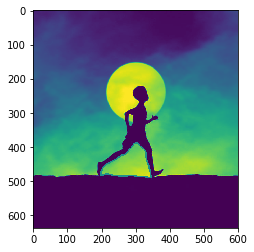

In [24]:
india = cv2.imread('silhouette.jpg', 0)
ret, thresh = cv2.threshold(india, 100, 255,0)
_, contours, hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]
india_cnt = cv2.drawContours(india, [cnt], 0, (127,255,0), 3)
plt.imshow(india_cnt)

In [25]:
print(ret)
print(thresh.shape)
print(len(contours))

100.0
(637, 600)
12


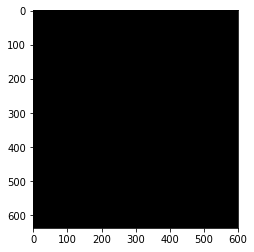

In [26]:
new_img = np.zeros((india.shape[0], india.shape[1], 3), np.uint8)
plt.imshow(new_img)

In [27]:
for x in range(new_img.shape[0]):
    for y in range(new_img.shape[1]):
        dist = cv2.pointPolygonTest(cnt, (x, y), True)
#         distances.append(dist)
        if dist < 0:
            color = ((46 + dist)/46) * 255
            new_img[x, y] = [0, color, 0]
        else:
            if dist == 0:
                new_img[x, y] = [255, 255, 255]
            else:
                color = ((250 - dist)/250) * 255
                new_img[x, y] = [0, 0, color]

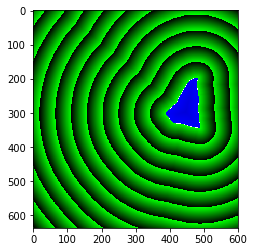

In [28]:
plt.imshow(new_img)